# Matplotlib & Seaborn - Scatterplots

---

## Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patches
import matplotlib.patheffects as plt_eff
import seaborn as sns

---

## Datasets

In [2]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")
planets = sns.load_dataset("planets")

---

---

# Basic scatterplot with *plt.plot*

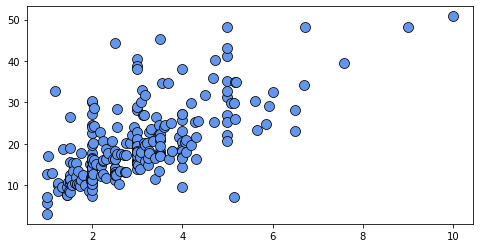

In [3]:
fig, ax = plt.subplots(figsize = (8, 4))

ordered_tips = tips.sort_values(by = "tip", ascending = True)

plt.plot("tip", "total_bill", data = ordered_tips,
         linestyle = "None", marker = "o", markersize = 10,
         markeredgecolor = "k", color = "cornflowerblue",
         markeredgewidth = 0.75)

plt.show()

---

# Basic Scatterplot with *plt.scatter*

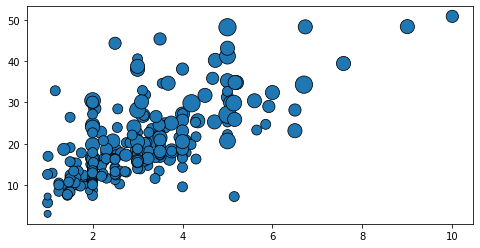

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))

plt.scatter(x = "tip", y = "total_bill", s = tips["size"]*50, data = tips,
            alpha = 1, edgecolor = "k", linewidth = 0.75, marker = "o")

plt.show()

---

---

# Basic Scatterplot with *regplot*

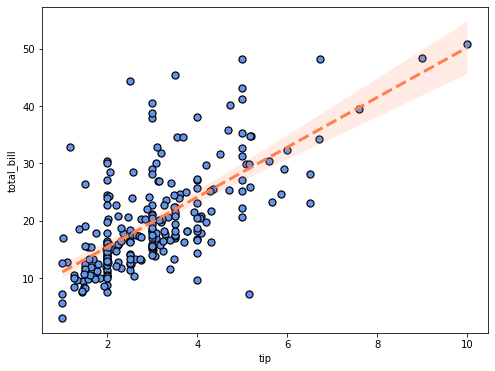

In [5]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.regplot(data = tips, x = "tip", y = "total_bill",
            marker = "o", fit_reg = True,
            scatter_kws = {"color": "cornflowerblue", "alpha": 1, "s": 50, "edgecolor": "k", "linewidth": 1.2},
            line_kws = {"color": "coral", "alpha": 1, "lw": 3, "linestyle": "--"})

plt.show()

---

# Scatterplot with categorical *hue*

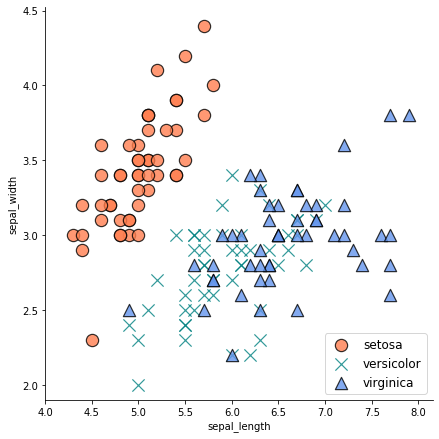

In [6]:
sns.lmplot(data = iris, x = "sepal_length", y = "sepal_width", hue = "species",
           fit_reg = False, legend = False,
           height = 6, markers = ["o", "x", "^"],
           scatter_kws = {"s": 150, "edgecolor": "k", "linewidth": 1.2},
           palette = {"setosa": "coral", "virginica": "cornflowerblue", "versicolor": "teal"})

plt.xlim(4, None)
plt.ylim(1.9, None)
plt.legend(fontsize = 12, loc = "lower right")
plt.show()

---

# Scatterplot with Highlight

In [7]:
df = tips.copy()[["tip","total_bill"]]
df["color"] = np.where((df["total_bill"] > 19) & (df["total_bill"] < 20), "coral", "cornflowerblue")
df["size"] = np.where((df["total_bill"] > 19) & (df["total_bill"] < 20), 200, 50)

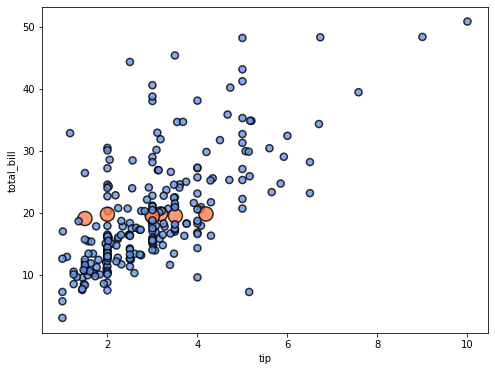

In [8]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.regplot(data = df,
            x = "tip",
            y = "total_bill",
            fit_reg = False,
            scatter_kws = {"facecolor": df["color"],
                           "s": df["size"],
                           "edgecolor": "k", "linewidth": 1.5})

plt.show()

---

# Scatterplot with *hue* & *size*

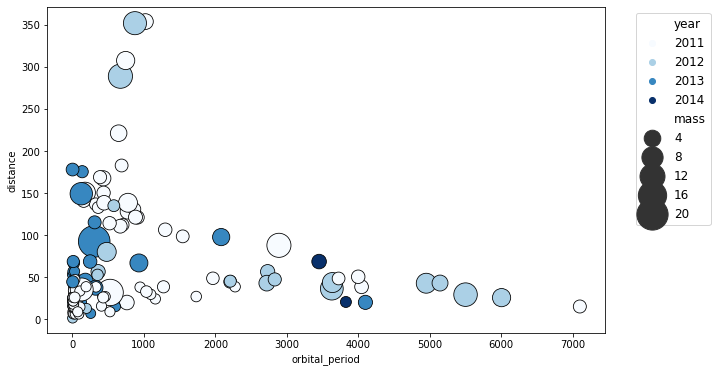

In [9]:
fig, ax = plt.subplots(figsize = (10, 6))

df = planets.copy()[planets.year >= 2011]

plot = sns.scatterplot(data = df, x = "orbital_period", y = "distance",
                size = "mass", hue = "year", palette = "Blues",
                legend = True, sizes = (100, 1000),
                alpha = 1, edgecolor = "k")

leg = ax.legend(bbox_to_anchor = (1.2, 1), fontsize = 12)

plt.show()

---

# Jointplot in *scatter* mode

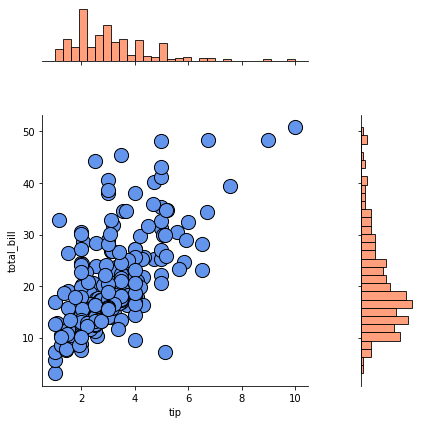

In [10]:
sns.jointplot(data = tips, x = "tip", y = "total_bill",
              kind = "scatter", s = 200, edgecolor = "k", linewidth = 1,
              color = "cornflowerblue", height = 6, ratio = 3, space = 1,
              marginal_kws = {"bins": 30, "fill": True, "color": "coral"})

plt.show()

---

# Pairplot with *scatter* mode

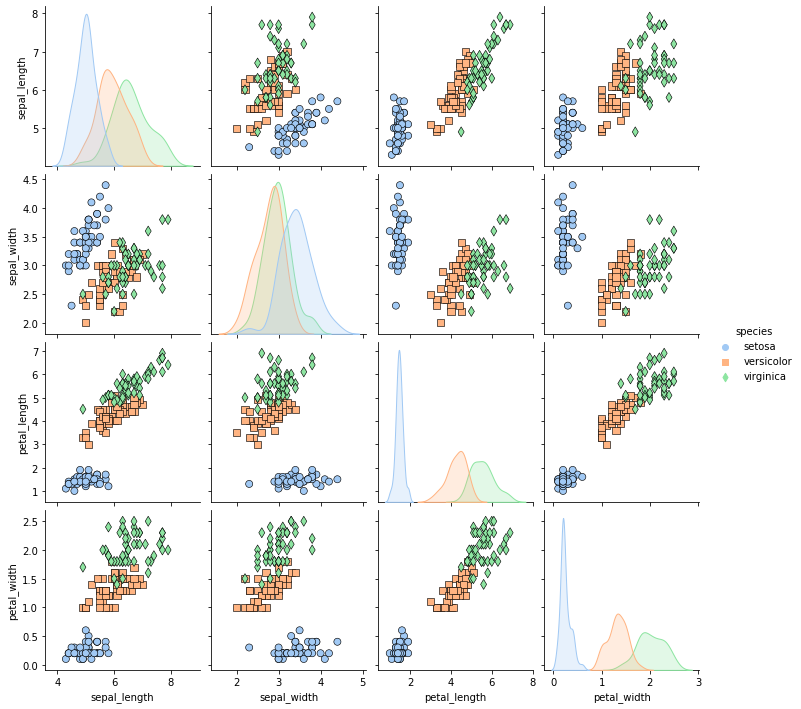

In [11]:
sns.pairplot(data = iris, hue = "species",
             kind = "scatter", palette = "pastel", markers = ["o","s","d"],
             plot_kws = {"s": 50, "edgecolor": "k", "linewidth": 0.6}, height = 2.5)

plt.show()

---

# Pairplot with *reg* mode

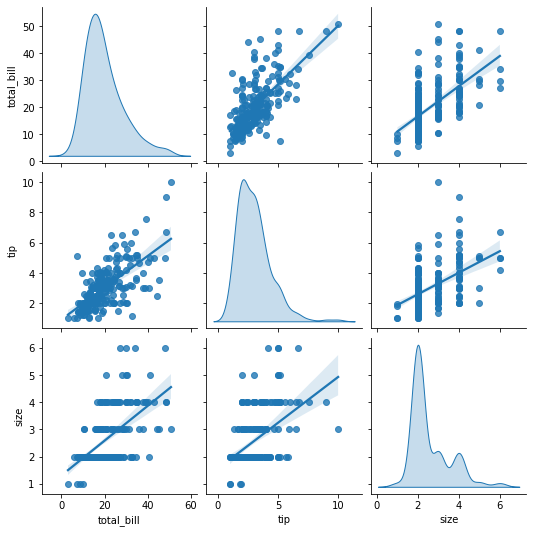

In [12]:
sns.pairplot(data = tips, kind = "reg",
             diag_kind = "kde", height = 2.5)

plt.show()

---

# Scatterplot with FacetGrid

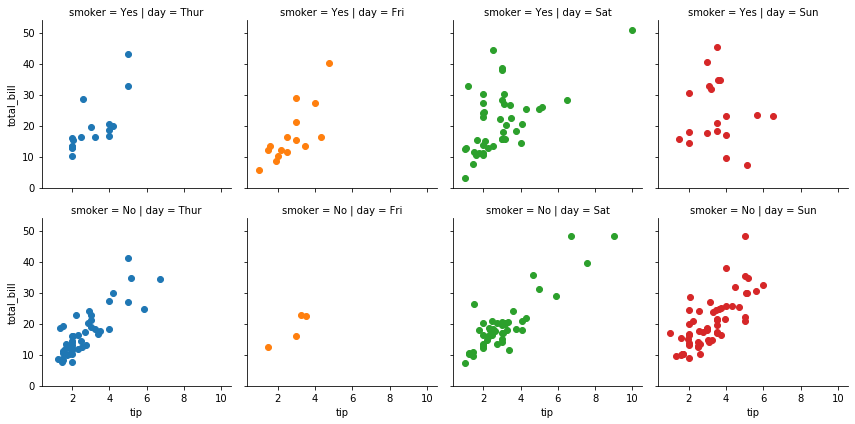

In [13]:
grid = sns.FacetGrid(data = tips,
                     row = "smoker",
                     col = "day",
                     hue = "day",
                     height = 3)

grid = grid.map(plt.scatter, "tip", "total_bill")

---